In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import Fake27QPulseV1, GenericBackendV2
import qiskit.circuit.library as lib 
# import Our_Qiskit_Functions as oq
import math as m

6


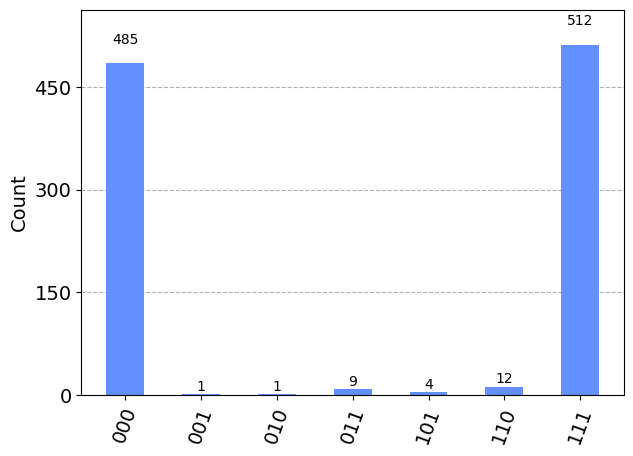

In [15]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.fake_provider import GenericBackendV2, Fake5QV1, Fake27QPulseV1, Fake20QV1
# 准确率：
# GenericBackendV2 > +Pluse > without Pluse
from qiskit.visualization import plot_histogram
 
# Generate a 5-qubit simulated backend
backend = GenericBackendV2(num_qubits=5)
# backend = Fake5QV1()
# backend = Fake27QPulseV1()
# backend = Fake20QV1()
 
# Create a simple circuit
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(0,2)
circuit.measure_all()
circuit.draw('mpl')
 
# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw('mpl')
print(transpiled_circuit.depth())
 
# Run the transpiled circuit using the simulated backend
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
plot_histogram(counts)

In [5]:
from qiskit_aer import noise

qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure_all()

noisy_backend = GenericBackendV2(num_qubits=3)

service = QiskitRuntimeService()
device_backend = service.backend('ibmq_qasm_simulator')
noise_model = noise.NoiseModel.from_backend(GenericBackendV2(num_qubits=3))
device_backend.options.update_options(noise_model=noise_model)
sampler = Sampler(backend=device_backend)
output = sampler.run(transpile(qc, noisy_backend)).result()
print(output)

C:\ProgramData\anaconda3\envs\qiskitenv-1.0\lib\site-packages\qiskit_ibm_runtime\qiskit_runtime_service.py:879: UserWarning: Cloud simulators will be deprecated on 15 May 2024. Use the new local testing mode in qiskit-ibm-runtime version 0.22.0 or later to meet your debugging needs.
  warnings.warn(warning_message)


SamplerResult(quasi_dists=[{0: 0.48275, 7: 0.51725}], metadata=[{'shots': 4000, 'circuit_metadata': {}}])


In [6]:
print(output.quasi_dists)

[{0: 0.48275, 7: 0.51725}]


In [7]:
print(output.quasi_dists[0])

{0: 0.48275, 7: 0.51725}


In [8]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure_all()

simulator = AerSimulator()
output = simulator.run(transpile(qc, simulator)).result()
print(output)

Result(backend_name='aer_simulator', backend_version='0.13.3', qobj_id='', job_id='bdba6522-bce7-47fc-b91a-9579325538e6', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 480, '0x7': 544}), header=QobjExperimentHeader(creg_sizes=[['meas', 3]], global_phase=0.0, memory_slots=3, n_qubits=3, name='circuit-647', qreg_sizes=[['q', 3]], metadata={}), status=DONE, seed_simulator=3512742982, metadata={'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1, 2], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 3, 'num_clbits': 3, 'time_taken': 0.0031752, 'sample_measure_time': 0.001033, 'input_qubit_map': [[0, 0], [1, 1], [2, 2]], 'max_memory_mb': 16197, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 12, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}, time_taken=0.0031752)], dat

In [11]:
output.get_counts()

{'000': 480, '111': 544}